## Support Vector Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Let's create synthetic data points
from sklearn.datasets import make_classification

In [3]:
##create the dataset
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=2, n_redundant=0)

In [4]:
X, y

(array([[-4.33096367, -0.11930603],
        [-0.96810312,  0.96206338],
        [ 1.891238  , -1.18196784],
        ...,
        [ 1.87324531, -1.08008316],
        [-1.80736926, -1.95043464],
        [-0.36190499, -0.43054444]]),
 array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
        1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
        1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
        0, 1, 0, 1, 0, 0, 0, 

In [5]:
X = pd.DataFrame(X)
X.head()

,0,1
0,-4.330964,-0.119306
1,-0.968103,0.962063
2,1.891238,-1.181968
3,-0.896087,-0.975339
4,-0.742225,-0.779786


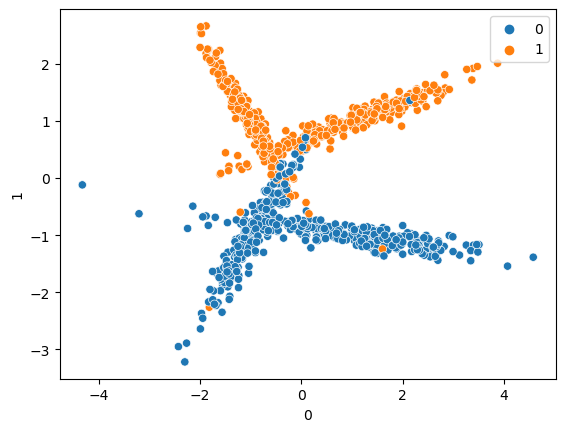

In [6]:
import warnings
warnings.filterwarnings('ignore')
sns.scatterplot(x= X[0], y = X[1], hue=y)
plt.show()

In [7]:
# split the data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [8]:
from sklearn.svm import SVC

In [9]:
svc = SVC(kernel='linear')

In [10]:
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [11]:
# predictions
y_pred = svc.predict(X_test)

In [32]:
svc.intercept_, svc.coef_

(array([-0.07822207]), array([[-0.19113902,  2.45665698]]))

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       117
           1       0.94      0.98      0.96       133

    accuracy                           0.96       250
   macro avg       0.96      0.95      0.96       250
weighted avg       0.96      0.96      0.96       250



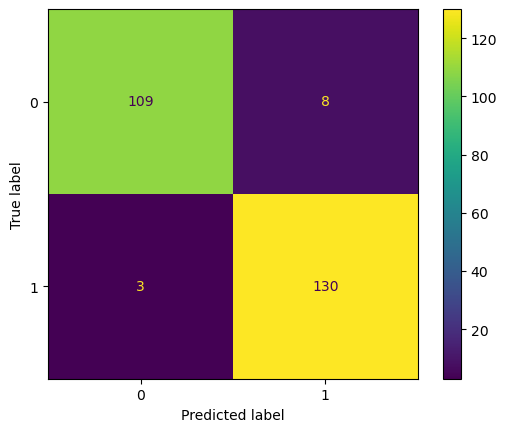

In [13]:
print(classification_report(y_test, y_pred))
cm =confusion_matrix(y_test, y_pred, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot(values_format='')
plt.show()

In [14]:
rbf = SVC(kernel='rbf')

In [15]:
rbf.fit(X_train, y_train)

SVC()

In [16]:
y_pred = rbf.predict(X_test)

In [31]:
rbf.intercept_

array([-0.16799493])

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       117
           1       0.94      0.98      0.96       133

    accuracy                           0.96       250
   macro avg       0.96      0.95      0.96       250
weighted avg       0.96      0.96      0.96       250



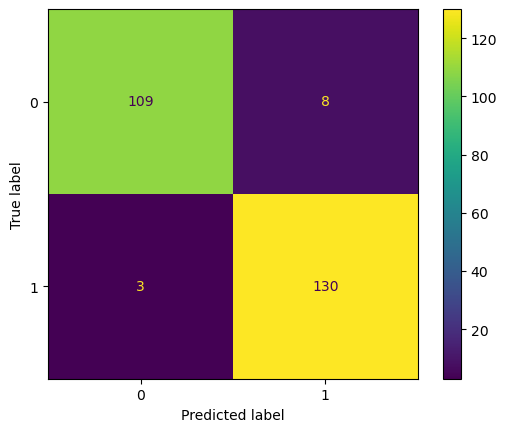

In [17]:
print(classification_report(y_test, y_pred))
cm =confusion_matrix(y_test, y_pred, labels=rbf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rbf.classes_)
disp.plot(values_format='')
plt.show()

Because the RBF Kernel is used instead of Linear, the accuracy has improved. Let's check for other kernels

In [18]:
poly = SVC(kernel='poly')
poly.fit(X_train, y_train)
#predictions
y_pred = poly.predict(X_test)

              precision    recall  f1-score   support

           0       0.99      0.88      0.93       117
           1       0.90      0.99      0.95       133

    accuracy                           0.94       250
   macro avg       0.95      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250



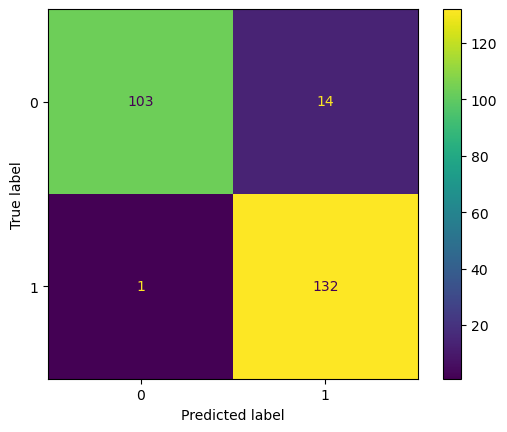

In [19]:
print(classification_report(y_test, y_pred))
cm =confusion_matrix(y_test, y_pred, labels=poly.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=poly.classes_)
disp.plot(values_format='')
plt.show()

In [20]:
sig = SVC(kernel='sigmoid')
sig.fit(X_train, y_train)
#predictions
y_pred = sig.predict(X_test)

In [35]:
sig.intercept_

array([-0.61339916])

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       117
           1       0.91      0.91      0.91       133

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250



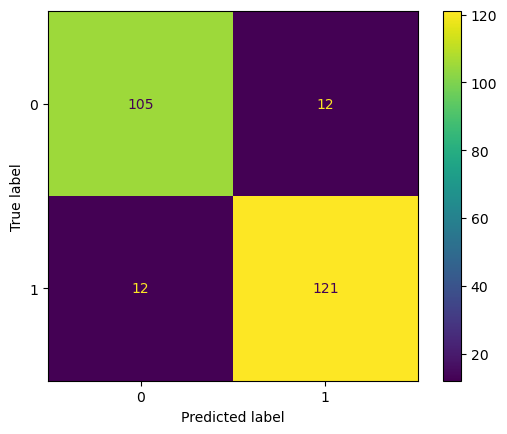

In [21]:
print(classification_report(y_test, y_pred))
cm =confusion_matrix(y_test, y_pred, labels=sig.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sig.classes_)
disp.plot(values_format='')
plt.show()

Out of all the kernels used, RBF is giving better accuarcy and therefore can be selected for predictions

In [23]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
params = {
    'C':[0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel':['rbf']
}

In [24]:
grid = GridSearchCV(SVC(), param_grid=params, refit = True, cv=5, verbose=3)

In [25]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.987 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.973 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.987 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.980 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.967 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [26]:
grid.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}

In [27]:
# prediction
y_pred = grid.predict(X_test)

              precision    recall  f1-score   support

           0       0.97      0.92      0.95       117
           1       0.94      0.98      0.96       133

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250



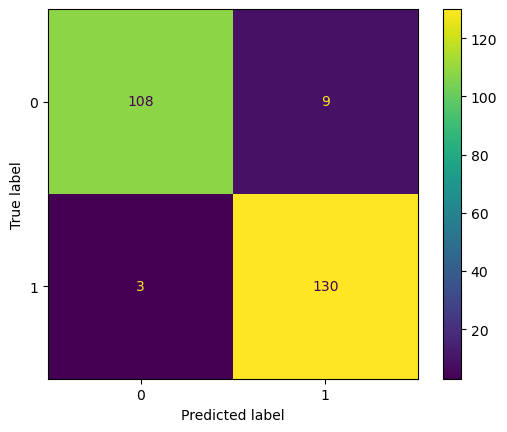

In [28]:
print(classification_report(y_test, y_pred))
cm =confusion_matrix(y_test, y_pred, labels=grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_)
disp.plot(values_format='')
plt.show()

The accuracy has improved to 95%